In [1]:
#Consultas: 
#https://realpython.com/python-opencv-color-spaces/
#https://www.youtube.com/watch?v=Q0IPYlIK-4A

In [2]:
import cv2

In [3]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [4]:
len(flags)

274

In [5]:
flags[40]

'COLOR_BGR2HLS'

In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [8]:
nemo = cv2.imread('cafe2.png')

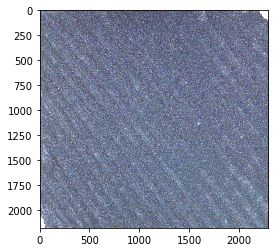

In [9]:
plt.imshow(nemo)

In [10]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)

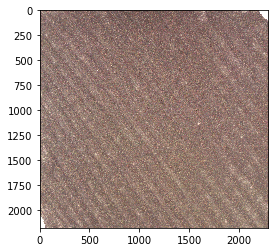

In [11]:
plt.imshow(nemo)

In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
from matplotlib import cm

In [14]:
from matplotlib import colors

Observando a distribuição de cor na imagem RGB

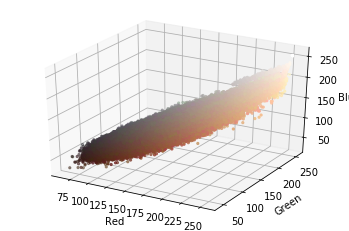

In [15]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [30]:
fig.savefig("rgb.png", dpi=300)

Observando a distribuição de cor na imagem HSV

In [16]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

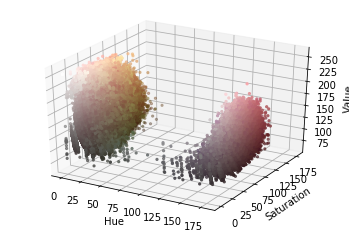

In [17]:
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [ ]:
fig.savefig("hsv.png", dpi=300)

Há nuvens de pontos (pixels) bem definidas na cor: verde, magenta/vermelho, cinza/preto e amarelo/laranja (Terra). 
O desafio agora é definir intervalos que representem adequadamente cada grupo de pixels.

In [18]:
#Definir os ranges de cor pro tipo verde

light_green =(12, 20, 72)
dark_green = (70, 180, 200)

#light_red = np.array([161, 155, 84])
#dark_red = np.array([161, 155, 84])

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), light_green, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_green, dtype=np.uint8) / 255.0

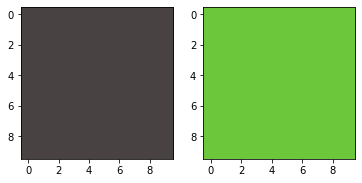

In [19]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

Máscara de segmentação dos pixels do café vermelho

In [20]:
mask_green = cv2.inRange(hsv_nemo, light_green, dark_green)

In [21]:
result = cv2.bitwise_and(nemo, nemo, mask=mask_green)

O resultado de aplicação da máscara na imagem é uma resultante apenas com as informações do intervalo de cor definido

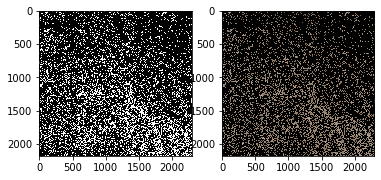

In [38]:
plt.subplot(1, 2, 1)
plt.imshow(mask_green, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [22]:
#plt.savefig("mask-verde.png", dpi=300)

In [23]:
result.shape

(2180, 2292, 3)

O processo se repete para cada cor que se deseja extrair.

In [24]:
#Vermelho:
light_red = (75, 20, 0) #(0, 0, 200)
dark_red = (180, 180, 175) #(145, 60, 255)

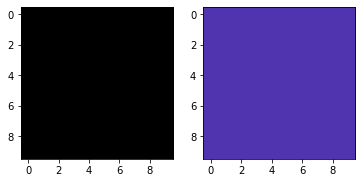

In [25]:
lw_square = np.full((10, 10, 3), light_red, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_red, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

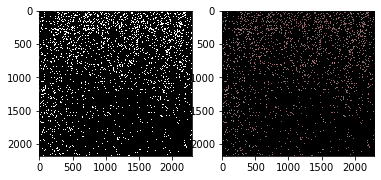

In [26]:
mask_red = cv2.inRange(hsv_nemo, light_red, dark_red)
result_red = cv2.bitwise_and(nemo, nemo, mask=mask_red)

plt.subplot(1, 2, 1)
plt.imshow(mask_red, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_red)
plt.show()

In [30]:
#plt.savefig("mask-vermelha.png", dpi=300)

In [31]:
#Preto será o que sobrou.

A seguir o resultado da união de todas as máscaras. A ideia é que isso gere uma imagem com cor branca em toda a região anotada. Isso prova que as máscaras de fato extraem os intervaloes de cor e conseguem descrever adequadamente essas distribuições na imagem original

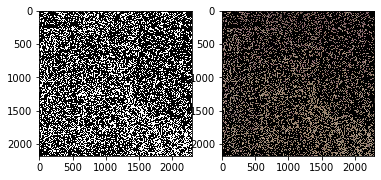

In [40]:
final_mask = mask_green + mask_red

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [41]:
plt.savefig("mask-verde-vermelha.png", dpi=300)

<Figure size 432x288 with 0 Axes>

In [34]:
w, h = r.shape
total = w*h
total

4996560

In [35]:
#Percentual:
vermelho = cv2.countNonZero(mask_red)
(vermelho/total)*100

8.928662920089021

In [36]:
verde = cv2.countNonZero(mask_green)
(verde/total)*100

23.882711305378102

In [37]:
preto = total - (verde+vermelho)
(preto/total)*100

67.18862577453288